In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import modules
import importlib
importlib.reload(modules)

<module 'modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\modules.py'>

In [6]:
bounded_dists = modules.get_bounded_distribution()
#scripts.plot_histograms_of_samples(bounded_dists, s_size=100, nr_sample=10)
#moments_df = scripts.get_moments_df(bounded_dists, nr_moments=3, s_size=100, nr_sample=21)
#X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)
#svm_model(X, y, X_train, X_test, y_train, y_test, 5)

In [10]:
error = list()
for i in range(10,100):
    moments_df = modules.get_moments_df(bounded_dists, nr_moments=5, s_size=i, nr_sample=20)
    X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)
    error = svm_model(X, y, X_train, X_test, y_train, y_test, 5)
    print(error)

(0.5666666666666667, array([0.58333333, 0.66666667, 0.58333333, 0.54166667, 0.45833333]))
(0.7333333333333333, array([0.79166667, 0.75      , 0.625     , 0.75      , 0.75      ]))
(0.5249999999999999, array([0.75      , 0.54166667, 0.29166667, 0.5       , 0.54166667]))
(0.55, array([0.79166667, 0.58333333, 0.41666667, 0.45833333, 0.5       ]))
(0.5833333333333334, array([0.79166667, 0.70833333, 0.5       , 0.33333333, 0.58333333]))
(0.6, array([0.875     , 0.54166667, 0.33333333, 0.625     , 0.625     ]))
(0.7, array([0.79166667, 0.45833333, 0.79166667, 0.75      , 0.70833333]))
(0.6833333333333333, array([0.75      , 0.5       , 0.79166667, 0.58333333, 0.79166667]))
(0.725, array([0.83333333, 0.75      , 0.58333333, 0.66666667, 0.79166667]))
(0.7, array([0.75      , 0.5       , 0.83333333, 0.625     , 0.79166667]))
(0.675, array([0.75      , 0.70833333, 0.66666667, 0.625     , 0.625     ]))
(0.6749999999999999, array([0.66666667, 0.58333333, 0.79166667, 0.66666667, 0.66666667]))
(0.71

In [ ]:
longtail_dists = scripts.get_longtail_distribution()
#scripts.plot_histograms_of_samples(bounded_dists, s_size=100, nr_sample=10)
moments_df = scripts.get_moments_df(longtail_dists, nr_moments=3, s_size=100, nr_sample=21)
X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)
svm_model(X, y, X_train, X_test, y_train, y_test, 5)

In [ ]:
longtail_dists = scripts.get_longtail_distribution()
scripts.plot_histograms_of_samples(longtail_dists, s_size=100, nr_sample=10)
#moments_df = scripts.get_moments_df(longtail_dists, nr_moments=3, s_size=100, nr_sample=21)

In [171]:
for i in range(10,21):
    moments_df = scripts.get_moments_df(bounded_dists, nr_moments=5, s_size=100, nr_sample=i)
    X, y, X_train, X_test, y_train, y_test = prepare_data(moments_df, 0.2)
    error = svm_model(X, y, X_train, X_test, y_train, y_test, 5)
    #print(moments_df)
    print(error)

(0.9166666666666667, array([1.        , 1.        , 0.75      , 0.83333333, 1.        ]))
(0.6527472527472528, array([0.57142857, 0.69230769, 0.53846154, 0.69230769, 0.76923077]))
(0.4885714285714286, array([0.4       , 0.4       , 0.5       , 0.57142857, 0.57142857]))
(0.3633333333333333, array([0.25      , 0.25      , 0.25      , 0.66666667, 0.4       ]))
(0.44191176470588245, array([0.29411765, 0.47058824, 0.58823529, 0.29411765, 0.5625    ]))
(0.9333333333333333, array([1.        , 0.88888889, 0.83333333, 1.        , 0.94444444]))
(0.6884210526315788, array([0.6       , 0.68421053, 0.68421053, 0.78947368, 0.68421053]))
(0.5214285714285715, array([0.42857143, 0.42857143, 0.6       , 0.65      , 0.5       ]))
(0.4207792207792208, array([0.27272727, 0.27272727, 0.27272727, 0.76190476, 0.52380952]))
(0.6142292490118577, array([0.43478261, 0.47826087, 0.95652174, 0.56521739, 0.63636364]))
(0.9416666666666667, array([1.        , 0.83333333, 1.        , 0.91666667, 0.95833333]))


{'C': 1.2589254117941673, 'gamma': 1.0023052380778996, 'kernel': 'rbf'}


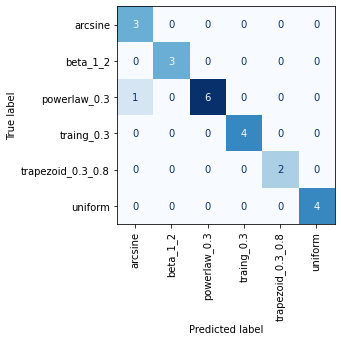

0.6142292490118577

In [176]:
# find the best parameters
param_grid = [
    {'C':np.logspace(0.1, 50, 20),
     'gamma':np.logspace(0.001, 10, 20), 
     'kernel':['rbf']},
]

optimal_params = GridSearchCV(SVC(), param_grid,cv=5, verbose=0)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

c = optimal_params.best_params_['C']
g = optimal_params.best_params_['gamma']

clf_svm = SVC(random_state=10, C=c, gamma=g)
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

c_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()

scores = cross_val_score(clf_svm, X, y, cv=5)
scores.mean()

In [194]:
optimal_params.cv_results_

{'mean_fit_time': array([0.00099764, 0.00162692, 0.00100398, 0.00100017, 0.00120244,
        0.00120053, 0.00161204, 0.00100617, 0.00139432, 0.00159335,
        0.00100083, 0.00120831, 0.0010004 , 0.00119801, 0.00119634,
        0.00120177, 0.00179157, 0.00101423, 0.00138779, 0.00139985,
        0.00080504, 0.00100007, 0.0012156 , 0.00100007, 0.00100012,
        0.00099888, 0.00110083, 0.00163822, 0.00099735, 0.00162005,
        0.00101976, 0.00099387, 0.00140595, 0.00120349, 0.00102224,
        0.00140862, 0.0010016 , 0.00102439, 0.00160151, 0.00099969,
        0.00080099, 0.00082097, 0.00084815, 0.00098944, 0.00120058,
        0.00101795, 0.00123153, 0.00103517, 0.00099959, 0.00160031,
        0.00141187, 0.00101056, 0.00121121, 0.00119591, 0.00100813,
        0.00120282, 0.00139999, 0.00203614, 0.0009963 , 0.00160017,
        0.00100574, 0.00101075, 0.00079994, 0.00100012, 0.00147033,
        0.00119448, 0.00100694, 0.00132036, 0.00119238, 0.00102272,
        0.00100026, 0.0012001 ,

In [8]:
def prepare_data(df, test_size):
    X = moments_df.drop('dist', axis=1)
    y = df['dist']
    
    # Scaling data
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, random_state=10)
    return X, y, X_train, X_test, y_train, y_test

In [9]:
def svm_model(X, y, X_train, X_test, y_train, y_test, cv):
    param_grid = [
        {'C':np.logspace(0.1, 50, 20),
         'gamma':np.logspace(0.001, 10, 20), 
         'kernel':['rbf']},
    ]

    optimal_params = GridSearchCV(SVC(), param_grid,cv=5, verbose=0)
    optimal_params.fit(X_train, y_train)

    clf_svm = SVC(random_state=10, C=optimal_params.best_params_['C'], gamma=optimal_params.best_params_['gamma'])
    clf_svm.fit(X_train, y_train)

    y_pred = clf_svm.predict(X_test)
    scores = cross_val_score(clf_svm, X, y, cv=cv)
    accuracy = scores.mean()
    return accuracy,scores